# Analysis

install packages:

In [1]:
#%pip install --upgrade pip
#%pip install numpy==1.26.4 pandas==2.2.1 scikit-posthocs --upgrade
!pip install pandas==2.2.1 numpy scikit-posthocs --upgrade

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


import packages:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scikit_posthocs as sp

load data

In [3]:
# load data
df = pd.read_csv("C+F Test Data - Data.csv")

# clean up data:

# Drop the "Notes" column
df_cleaned = df.drop(columns=["Notes"])

# Remove rows with NaN values
df_cleaned = df_cleaned.dropna()

# Identify the columns with "(aim)" in their names
aim_columns = [col for col in df_cleaned.columns if "(aim)" in col]

# Identify the columns with "(aim)" in their names
stream_columns = [col for col in df_cleaned.columns if "(stream)" in col]

# Identify the columns with "(speed)" in their names
speed_columns = [col for col in df_cleaned.columns if "(speed)" in col]

# Identify the columns with "(marathon)" in their names
marathon_columns = [col for col in df_cleaned.columns if "(marathon)" in col]

# Convert the aim columns from string to numerical lists
for col in aim_columns:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: list(map(int, x.split(','))))

for col in speed_columns:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: list(map(int, x.split(','))))

for col in marathon_columns:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: int(x))

stream_metrics = ["Miss Count","Accuracy","Unstable Rate"]

print(df_cleaned.head())

   Day      Date C+F or Placebo    Guess  \
0  1.0  02/12/25        Placebo  Placebo   
1  2.0  02/13/25            C+F      C+F   
3  3.0  02/15/25            C+F  Placebo   
4  4.0  02/16/25            C+F      C+F   
5  5.0  02/17/25        Placebo  Placebo   

  Kurui Zake Setsugekka (aim) (https://osu.ppy.sh/beatmapsets/481042#osu/1026787)  \
0                                       [30, 29, 45]                                
1                                       [38, 30, 34]                                
3                                       [29, 47, 42]                                
4                                       [45, 56, 37]                                
5                                       [35, 41, 42]                                

  Disconnected (aim) (https://osu.ppy.sh/beatmapsets/169874#osu/465548)  \
0                                      [84, 98, 119]                      
1                                       [90, 84, 99]                      

correct for day 13 where i only did the stream maps twice instead of three times

In [4]:
print(df_cleaned.loc[15,stream_columns])
# fucked
for i in range(2):
    df_cleaned.loc[15,stream_columns[i]] = df_cleaned.loc[15,stream_columns[i]] + "," + str(list(np.mean(eval(df_cleaned.loc[15,stream_columns[i]]),axis=0).round(2).tolist())).replace("[","(").replace("]",")")
print(df_cleaned.loc[15,stream_columns])
#df_cleaned[stream_columns].loc[15].iloc[0] = np.mean(eval(df_cleaned[stream_columns].loc[15].iloc[0]),axis=0)


CHOIR JAIL (stream) (https://osu.ppy.sh/beatmapsets/172688#osu/435350)                              (6,97.15,145.40),(0,99.05,134.89)
os-Uchuujin(Asterisk Makina Remix) (stream) (https://osu.ppy.sh/beatmapsets/325301#osu/722596)    (32,95.94,129.25),(35,95.99,125.42)
The Deceit / The Violation (stream) (https://osu.ppy.sh/beatmapsets/367631#osu/958098)             (9,93.48,152.00),(19,94.33,146.04)
Name: 15, dtype: object
CHOIR JAIL (stream) (https://osu.ppy.sh/beatmapsets/172688#osu/435350)                            (6,97.15,145.40),(0,99.05,134.89),(3.0, 98.1, ...
os-Uchuujin(Asterisk Makina Remix) (stream) (https://osu.ppy.sh/beatmapsets/325301#osu/722596)    (32,95.94,129.25),(35,95.99,125.42),(33.5, 95....
The Deceit / The Violation (stream) (https://osu.ppy.sh/beatmapsets/367631#osu/958098)                           (9,93.48,152.00),(19,94.33,146.04)
Name: 15, dtype: object


# Plot the Data

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

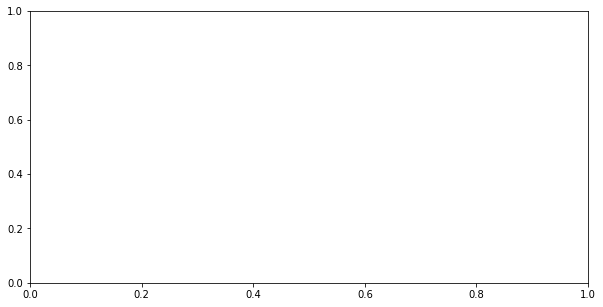

In [5]:
#def plot(title, dates, worst_vals, mid_vals, best_vals, metric="Miss Count", df_cleaned=df_cleaned):
def plot(title, dates, scores, metric="Miss Count", df_cleaned=df_cleaned):
    """
    plt.figure(figsize=(10, 5))
    plt.plot(dates, worst_vals, marker='o', label='Worst (Most Misses)')
    plt.plot(dates, mid_vals, marker='o', label='Middle')
    plt.plot(dates, best_vals, marker='o', label='Best (Fewest Misses)')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Miss Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()"""

    color_map = {'C+F': 'blue', 'Placebo': 'orange'}
    group_colors = df_cleaned['C+F or Placebo'].map(color_map).tolist()


    worst_vals, mid_vals, best_vals = list(zip(*[sorted(sublist) for sublist in scores]))
    first_vals, second_vals, third_vals = list(zip(*scores))

    all_vals = np.array([worst_vals, mid_vals, best_vals])
    mean_vals = np.nanmean(all_vals, axis=0)
    std_vals = np.nanstd(all_vals, axis=0)

    # Plotting
    plt.figure(figsize=(10, 5))

    # Individual lines
    plt.plot(dates, worst_vals, color='gray', linestyle='-', alpha=0.4)
    plt.plot(dates, mid_vals, color='gray', linestyle='--', alpha=0.4)
    plt.plot(dates, best_vals, color='gray', linestyle=':', alpha=0.4)

    # Color-coded points
    for i in range(len(df_cleaned)):
        plt.scatter(dates.iloc[i], first_vals[i], color=group_colors[i], marker='o')
        plt.scatter(dates.iloc[i], second_vals[i], color=group_colors[i], marker='^')
        plt.scatter(dates.iloc[i], third_vals[i], color=group_colors[i], marker='s')

    # Mean line
    plt.plot(dates, mean_vals, color='black', linewidth=2, label='Mean')

    # Fill between mean ± 3 std dev
    plt.fill_between(dates, mean_vals - 3 * std_vals, mean_vals + 3 * std_vals, color='black', alpha=0.1, label='±3 Std Dev')

    # Labels and title
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

    # Custom legend
    custom_lines = [
        plt.Line2D([0], [0], marker='o', color='w', label='First', markerfacecolor='gray', markersize=8),
        plt.Line2D([0], [0], marker='^', color='w', label='Second', markerfacecolor='gray', markersize=8),
        plt.Line2D([0], [0], marker='s', color='w', label='Third', markerfacecolor='gray', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='C+F', markerfacecolor='blue', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Placebo', markerfacecolor='orange', markersize=8),
        plt.Line2D([0], [0], color='black', lw=2, label='Mean'),
    ]
    plt.legend(handles=custom_lines, loc='upper left', fancybox=True, framealpha=0.5)
    plt.tight_layout()
    plt.show()
 
# aim 
for col in aim_columns:
    #aim_scores = list(zip(*[sorted(sublist) for sublist in df_cleaned[col]]))
    aim_scores = df_cleaned[col]
    plot(" (".join(col.split(" (")[0:-1])+" Miss Count", df_cleaned['Date'], aim_scores)

# stream
d = df_cleaned.drop([0,1,3])
for col in stream_columns:
    for i,metric in enumerate(stream_metrics):
        #stream_scores = list(zip(*[sorted([x[i] for x in eval(sublist)]) for sublist in d[col]]))
        stream_scores = [[x[i] for x in eval(sublist)] for sublist in d[col]]
        #if len(stream_scores) != 3:
        #    stream_scores += [np.mean(stream_scores,axis=0)]
        if len(list(zip(*stream_scores))) != 3:
            stream_scores = list(zip(*(list(zip(*stream_scores)) + [np.mean(list(zip(*stream_scores)),axis=0).tolist()])))
        plot(" (".join(col.split(" (")[0:-1])+" "+metric, d['Date'], stream_scores, metric=metric, df_cleaned=d)

# speed 
for col in speed_columns:
    #speed_scores = list(zip(*[sorted(sublist) for sublist in df_cleaned[col]]))
    speed_scores = df_cleaned[col]
    plot(" (".join(col.split(" (")[0:-1])+" Miss Count", df_cleaned['Date'], speed_scores)

# marathon
for col in marathon_columns:
    marathon_scores = list(df_cleaned[col])
    color_map = {'C+F': 'blue', 'Placebo': 'orange'}
    group_colors = df_cleaned['C+F or Placebo'].map(color_map).tolist()
    plt.figure(figsize=(10, 5))
    plt.plot(df_cleaned['Date'], marathon_scores, color='black', linewidth=2)
    for i in range(len(df_cleaned)):
        plt.scatter(df_cleaned['Date'].iloc[i], marathon_scores[i], color=group_colors[i], marker='o')
    plt.title(" (".join(col.split(" (")[0:-1])+" Miss Count")
    plt.xlabel('Date')
    plt.ylabel("Miss Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

# Check for Outliers
(https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm)

In [ ]:
def detect_outliers(data):
    filtered = sp.outliers_gesd(data, report=False, alpha=0.1)
    if len(filtered)==len(data):
        print("no outliers")
    else:
        print("outliers: "+repr(set(filtered).symmetric_difference(set(data))))
        #print("outlier index: ")
    return filtered

for col in aim_columns:
    print(col)
    data = [score for sublist in df_cleaned[col] for score in sublist]
    detect_outliers(data)

d = df_cleaned.drop([0,1,3])
for col in stream_columns:
    for i,metric in enumerate(stream_metrics):
        print(col, metric)
        data = [x[i] for sublist in d[col] for x in eval(sublist)]
        detect_outliers(data)

for col in speed_columns:
    print(col)
    data = [score for sublist in df_cleaned[col] for score in sublist]
    detect_outliers(data)

for col in marathon_columns:
    print(col)
    data = [score for score in df_cleaned[col]]
    detect_outliers(data)

## Normal Probability Plots

**generate a normal probability plot of each of the columns excluding day, date, C+F or Placebo, Guess**

In [ ]:
def graph(cols):
    for col in cols:
        plt.figure(figsize=(3, 2))
        stats.probplot([score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col] for score in sublist], dist="norm", plot=plt)
        plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with Placebo')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Ordered Values')
        plt.show()
        
        plt.figure(figsize=(3, 2))
        stats.probplot([score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "C+F"][col] for score in sublist], dist="norm", plot=plt)
        plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with C+F')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Ordered Values')
        plt.show()

# aim maps
"""
for col in aim_columns:
    plt.figure(figsize=(3, 2))
    stats.probplot([score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col] for score in sublist], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with Placebo')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()
    
    plt.figure(figsize=(3, 2))
    stats.probplot([score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "C+F"][col] for score in sublist], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with C+F')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()"""
graph(aim_columns)
    
# stream maps
for col in stream_columns:
    """
    plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}"')
    fig, axes = plt.subplots(2,3, figsize=(3, 2))
    for i,x in enumerate(["misses","accuracy","unstable rate"]):
        ax = axes[i][0]
        print([sublist[1:-1].split(",")[0] for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col]])
        stats.probplot([sublist[1:-1].split(",")[0] for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col]], dist="norm", plot=ax)
        ax.title(f'Placebo {x}')
        ax.xlabel('Theoretical Quantiles')
        ax.ylabel('Ordered Values')
        
        ax = axes[i][1]
        stats.probplot([sublist[1] for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col]], dist="norm", plot=ax)
        ax.title(f'C+F {x}')
        ax.xlabel('Theoretical Quantiles')
        ax.ylabel('Ordered Values')
    plt.show()"""
    for i,metric in enumerate(stream_metrics):
        d = df_cleaned.drop([0,1,3])
        plt.figure(figsize=(3, 2))
        #print([score[i] for sublist in d[d["C+F or Placebo"] == "Placebo"][col] for score in eval(sublist)])
        stats.probplot([score[i] for sublist in d[d["C+F or Placebo"] == "Placebo"][col] for score in eval(sublist)], dist="norm", plot=plt)
        plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with Placebo ({metric})')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Ordered Values')
        plt.show()
        
        plt.figure(figsize=(3, 2))
        stats.probplot([score[i] for sublist in d[d["C+F or Placebo"] == "C+F"][col] for score in eval(sublist)], dist="norm", plot=plt)
        plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with C+F ({metric})')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Ordered Values')
        plt.show()

# speed maps
graph(speed_columns)

# marathon maps
for col in marathon_columns:
    plt.figure(figsize=(3, 2))
    stats.probplot([score for score in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col]], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with Placebo')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()
    
    plt.figure(figsize=(3, 2))
    stats.probplot([score for score in df_cleaned[df_cleaned["C+F or Placebo"] == "C+F"][col]], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot for "{" ".join(col.split(" ")[0:-1])}" with C+F')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

some of the graphs show somewhat non-linear behaviour. however, the graphs all have a reasonably positive correlation, which suggests that the random variables are approximately normally distributed.


## Detecting Outliers

Using the standard

# Hypothesis Tests

## Guesses Column

"""perform a hypothesis test to determine whether the "Guess" column has significant correlation with the "C+F or Placebo" column. ignore the rows with "Known" values"""

H0: C+F is indistinguishable from Placebo (uniform distribution is a fitting model)
H1: C+F is distinguishable from Placebo (uniform distribution is not a fitting model)

In [ ]:
from scipy.stats import chi2_contingency

# Filter out rows where "Guess" is "Known"
df_filtered = df_cleaned[(df_cleaned["Guess"] != "Known") & (df_cleaned["C+F or Placebo"] != "Known")]

# Create a contingency table
contingency_table = pd.crosstab(df_filtered["Guess"], df_filtered["C+F or Placebo"])

# Perform the chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
#print(chi2_stat, p_value)

print(f"p={p_value:.3g}")
if p_value < 0.1:
    print("p < 0.1 so the test is significant at the 10% level and there is sufficient evidence to reject H0.")
    print("Therefore, there is sufficient evidence to say that the subject can distinguish C+F from Placebo.")
else:
    print("p > 0.1 so the test is insignificant at the 10% level and there is insufficient evidence to reject H0.")
    print("Therefore, there is insufficient evidence to say that the subject can distinguish C+F from Placebo.")

## Aim Maps

**for each of the three columns with "(aim)" in their name, perform appropriate hypothesis tests at the 10% significance level to determine whether or not they are influenced by the "C+F or Placebo" column**

In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for each "(aim)" column
results = {}
alpha = 0.10  # 10% significance level

for col in aim_columns:
    # Split data into two groups: C+F and Placebo
    c_f_values = [score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "C+F"][col] for score in sublist]
    placebo_values = [score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col] for score in sublist]

    # Perform independent t-test
    t_stat, p_value = ttest_ind(c_f_values, placebo_values, equal_var=False)

    # Store results
    results[col] = {"t-statistic": t_stat, "p-value": p_value, "Significant": p_value < alpha}

results_df = pd.DataFrame(results).T



print(results_df)

All entries are False. Therefore there is no evidence here to suggest that C+F has any benefits to placebo.

## Speed Maps

**perform the same tests for the (speed) columns (same format)**

In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for each "(aim)" column
results = {}
alpha = 0.10  # 10% significance level

for col in speed_columns:
    # Split data into two groups: C+F and Placebo
    c_f_values = [score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "C+F"][col] for score in sublist]
    placebo_values = [score for sublist in df_cleaned[df_cleaned["C+F or Placebo"] == "Placebo"][col] for score in sublist]

    # Perform independent t-test
    t_stat, p_value = ttest_ind(c_f_values, placebo_values, equal_var=False)

    # Store results
    results[col] = {"t-statistic": t_stat, "p-value": p_value, "Significant": p_value < alpha}

results_df = pd.DataFrame(results).T



print(results_df)

The test produces significant evidence for improvement from C+F in two of the three speed maps. The excluded map was the easiest of the three.

## Stream Maps

In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for each "(aim)" column
results = {}
alpha = 0.10  # 10% significance level
d = df_cleaned.drop([0,1,3])
# correct for os-uchuujin outlier
#d = df_cleaned.drop([0,1,3,8])

for col in stream_columns:
    for i,x in enumerate(stream_metrics):
        # Split data into two groups: C+F and Placebo
        c_f_values = [float(score[i]) for sublist in d[d["C+F or Placebo"] == "C+F"][col] for score in eval(sublist)]
        placebo_values = [float(score[i]) for sublist in d[d["C+F or Placebo"] == "Placebo"][col] for score in eval(sublist)]
    
        #print(c_f_values)
    
        # Perform independent t-test
        t_stat, p_value = ttest_ind(c_f_values, placebo_values, equal_var=False)
    
        # Store results
        results[col,x] = {"t-statistic": t_stat, "p-value": p_value, "Significant": p_value < alpha}

results_df = pd.DataFrame(results).T

print(results_df)

the test yields significant results for:

-choir jail (accuracy)

-os-uchuujin (unstable rate)

-the deceit (unstable rate)

9 tests are performed, p(Bin(9, 0.1) >= 3) = 0.0530 < 0.1

this suggests that C+F helps lower unstable rate for higher bpm and more difficult stream maps, and might help increase accuracy for consistency stream maps.

in total, 16 tests are performed and 6 significant results were obtained, and p(Bin(16, 0.1) >= 6) = 0.00330, which rudimentarily suggests that this study has not fallen victim to a fallacy of multiple comparisons. 

## Marathon Maps

In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for each "(aim)" column
results = {}
alpha = 0.10  # 10% significance level
#d = df_cleaned.drop([0,1,3,4])
d = df_cleaned.copy()
for col in marathon_columns:
    # Split data into two groups: C+F and Placebo
    c_f_values = [score for score in d[d["C+F or Placebo"] == "C+F"][col]]
    placebo_values = [score for score in d[d["C+F or Placebo"] == "Placebo"][col]]

    # Perform independent t-test
    t_stat, p_value = ttest_ind(c_f_values, placebo_values, equal_var=False)

    # Store results
    results[col] = {"t-statistic": t_stat, "p-value": p_value, "Significant": p_value < alpha}

results_df = pd.DataFrame(results).T



print(results_df)